### The methods used to handle imbalance 

#### 1- Under sampling majority class 
#### 2- over sampling minority class by duplication 
#### 3- over sampling minority class using SMOTE (Synthetic Minority Over-Sampling Technique)
#### 4- Ensemble Method 
#### 5- Focal Loss 

In [1]:
import numpy as np 
import tensorflow as tf
import pandas as pd 


##  1. Under-Sampling the Majority Class

### ✔ Idea
Reduce the size of the majority class to match the minority class.  
This makes the dataset more balanced but may remove important information.


In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
import numpy as np

# create an imbalanced dataset
X, y = make_classification(n_samples=5000, weights=[0.9, 0.1], random_state=42)

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

print("Original:", np.bincount(y))
print("After Under Sampling:", np.bincount(y_res))

Original: [4477  523]
After Under Sampling: [523 523]


## 2. Over-Sampling the Minority Class by Duplication

### ✔ Idea

Copy minority class samples until the classes become balanced.
Simple but can cause overfitting because no new information is added.

In [4]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

print("Original:", np.bincount(y))
print("After Over Sampling:", np.bincount(y_res))

Original: [4477  523]
After Over Sampling: [4477 4477]


## 3. SMOTE (Synthetic Minority Oversampling Technique)

### ✔ Idea

Instead of duplication, SMOTE generates new synthetic samples by interpolating between nearest minority class neighbors.
This helps create more diverse samples and reduces overfitting.

In [5]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

print("Original:", np.bincount(y))
print("After SMOTE:", np.bincount(y_sm))

Original: [4477  523]
After SMOTE: [4477 4477]


## 4. Ensemble Methods for Imbalanced Data

### ✔ Idea

Use specialized algorithms that naturally handle imbalance, such as:

Balanced Random Forest

EasyEnsemble / Balanced Bagging

XGBoost with scale_pos_weight

LightGBM with is_unbalance

In [6]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = BalancedRandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1363
           1       0.59      0.81      0.68       137

    accuracy                           0.93      1500
   macro avg       0.79      0.88      0.82      1500
weighted avg       0.94      0.93      0.94      1500



## 5. Focal Loss (Deep Learning)

### ✔ Idea

Standard cross-entropy treats all samples equally.
Focal Loss adds a weight that focuses training on hard misclassified samples.

Formula:

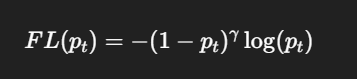

Perfect for highly imbalanced problems like medical images or fraud detection.

In [11]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

def focal_loss(gamma=2., alpha=0.25):

    def loss(y_true, y_pred):
        bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
        pt = tf.exp(-bce)
        focal = alpha * (1-pt)**gamma * bce
        return focal
    
    return loss


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# build model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1, activation='sigmoid')
])

# compile model
model.compile(
    optimizer='adam',
    loss=focal_loss(),
    metrics=['accuracy']
)

# train model
model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val)
)


d:\programs\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.6820 - loss: 0.0485 - val_accuracy: 0.8880 - val_loss: 0.0195
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8926 - loss: 0.0180 - val_accuracy: 0.9173 - val_loss: 0.0146
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9086 - loss: 0.0153 - val_accuracy: 0.9220 - val_loss: 0.0136
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9163 - loss: 0.0145 - val_accuracy: 0.9200 - val_loss: 0.0133
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9203 - loss: 0.0140 - val_accuracy: 0.9193 - val_loss: 0.0132
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9223 - loss: 0.0137 - val_accuracy: 0.9227 - val_loss: 0.0131
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9243 - loss: 0.0134 - val_accuracy: 0.9233 - val_loss: 0.0131
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9257 - loss: 0.0131 - val_accuracy: 